### HR Analytics Project- Understanding the Attrition in HR

#### Problem Statement

#### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Loading datasetLoading dataset

In [2]:
df = pd.read_csv(r"C:\Users\youra\OneDrive\Desktop\SAI_dsp35\Datatrained\DataTrained\Evaluation_Project\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Here 35 features including the target column.Attiration is target column classified as yes and no.

#### EDA

In [4]:
# checking the dimension of the dataset
df.shape

(1470, 35)

In [ ]:
This dataset is having 1470 rows and 35 columns

In [5]:
#checking the columns of this dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Overviewing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This method providesg the good overview of the dataset, which includes indexing type, column type, no-null values, data types and memory usage.

In [7]:
# Checking the datatypes of the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are  9 object datatype column and 26 int64 datatype column given below
Columns - 'Attrition', 'BusinessTravel','Department','EducationField','Gender','MaritalStatus ','JobRole','Over18','OverTime' are the columns having categorical data. And rest all columns are of int datatype.


In [8]:
# Checking the unique values of all the columns of this dataset.
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

These are the list of all the unique values present in this dataset.

In [9]:
# Checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Missing values are not present in this dataset.

##### Visualizing null values using Heatmap

<AxesSubplot:>

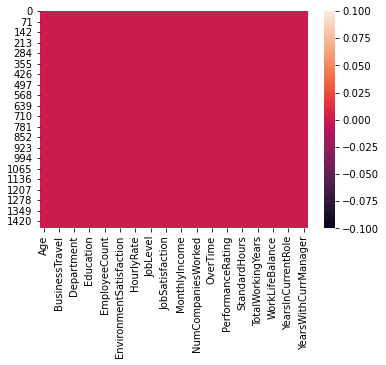

In [10]:
# checking for null values using heatmap
sns.heatmap(df.isnull())

From visualization also, its clear that there is no missing data.

In [11]:
# checking the uniqueness of the target column
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

#### Checking whether the target column is balanced or not

In [13]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

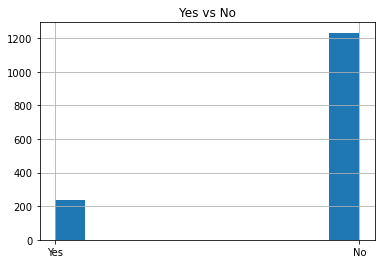

In [12]:
# List of values of target column
df['Attrition'].value_counts()
df['Attrition'].hist(grid='True')
plt.title('Yes vs No')
plt.show()

The label is having only two values either Yes or No.
The histograms shows that the data in the target column is not balanced.
Here we can see that the label column seems to be biased as the value count of No is 1233 whereas the value count of yes is very less i.e 237. Hence the dataset is imbalanced and we need to balance the data for futher proceedings.

In [14]:
# Checking whether the dataset contains any space
df.loc[df['Attrition']==" "]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


There is no space in the dataset.

#### Dropping the irrelavant Colums

In [15]:
# Dropping columns 'EmployeeNumber','EmployeeCount','Over18','StandardHours' as they are not relavant for the prediction of label.
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


This is the new dataframe having the relevant features.

In [16]:
# Checking for Numerical and Categorical data
numeric_col = df.select_dtypes(include=[np.number]).columns
categorical_col = df.select_dtypes(include=[np.object]).columns
print("Numerical features are:",numeric_col)
print("Categorical features are:",categorical_col)

Numerical features are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categorical features are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


#### Label Encoding

In [17]:
# Label Encodin the target variable "Attrition"
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Attrition']=lbl.fit_transform(df['Attrition'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Data Visualization
1.Univariate Analysis

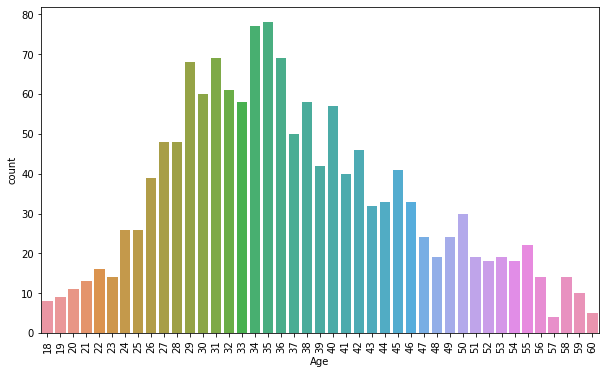

In [18]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(df['Age'])
plt.show()

This is the count of Age feature of the Employees in this dataset. Most of the Employees are in between age group of 26-45.

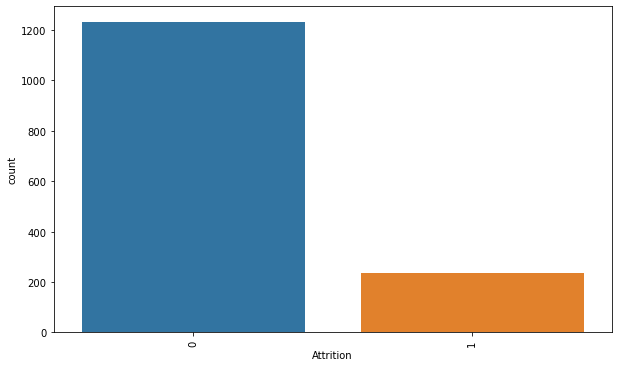

In [19]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(df['Attrition'])
plt.show()

From the visualization, we can say that approximately 1300 employees are still working in the organization and 200 have left their jobs.

<bound method IndexOpsMixin.value_counts of 0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64>


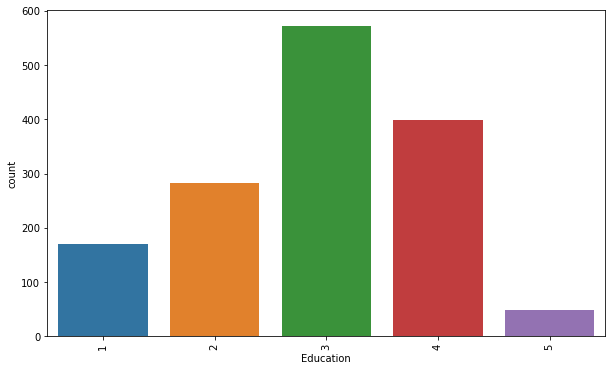

In [22]:
print(df['Education'].value_counts)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(df['Education'])
plt.show()

We can infer that majority of the Employees of the organization persued level 3 Education.

<bound method IndexOpsMixin.value_counts of 0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object>


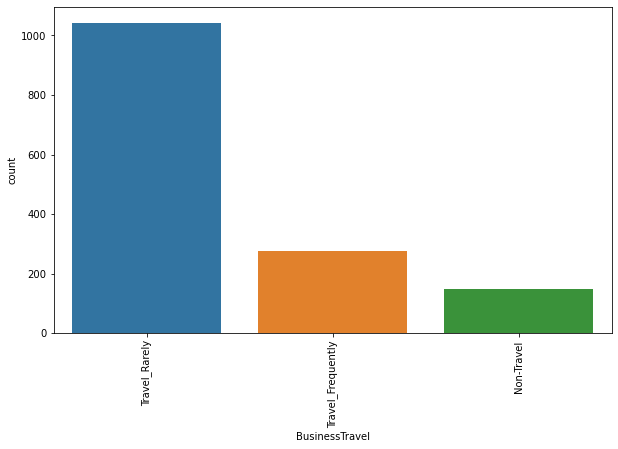

In [23]:
print(df['BusinessTravel'].value_counts)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(df['BusinessTravel'])
plt.show()

We can visualize that majority of the Employees have Rarely travelled history. Whereas nearly 200 employees are from Frequently traveled history. And nearly 170 to 180 employess are non travellers.

<bound method IndexOpsMixin.value_counts of 0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64>


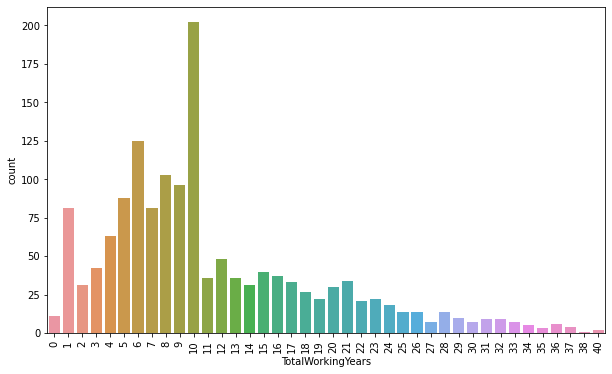

In [26]:
print(df['TotalWorkingYears'].value_counts)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(df['TotalWorkingYears'])
plt.show()

<bound method IndexOpsMixin.value_counts of 0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object>


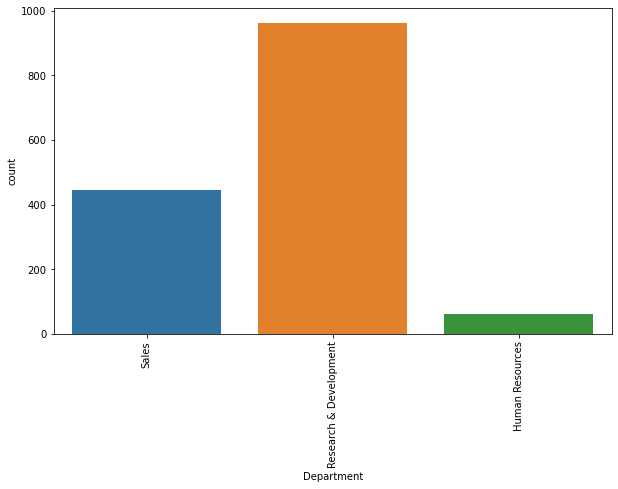

In [24]:
print(df['Department'].value_counts)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(df['Department'])
plt.show()

The above visualization clears that the majority employees are from Research & Development Department, foloowed by Sales. whereas There are very few employees with department HR.

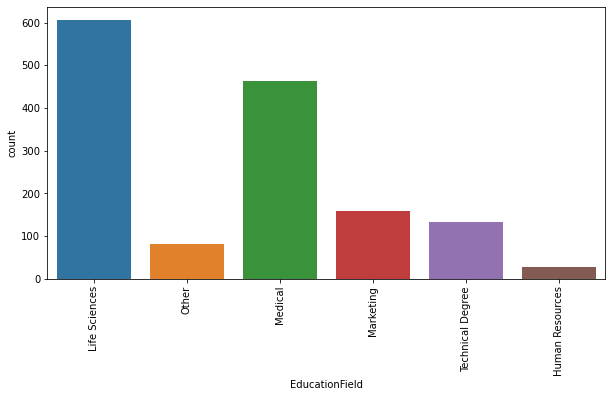

In [27]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['EducationField'])
plt.show()

Most of the Employees have their education field in Life Science, nearly 450 from Medical and very least from HR.

Male      882
Female    588
Name: Gender, dtype: int64


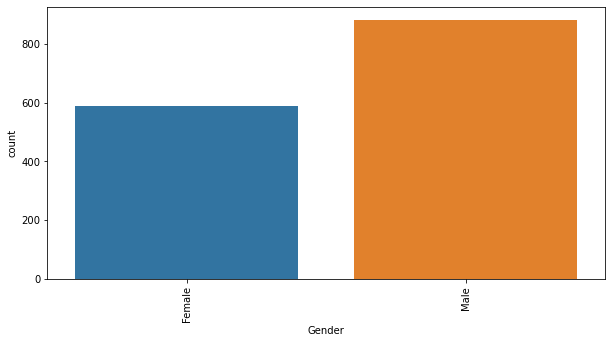

In [28]:
print(df['Gender'].value_counts())
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['Gender'])
plt.show()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


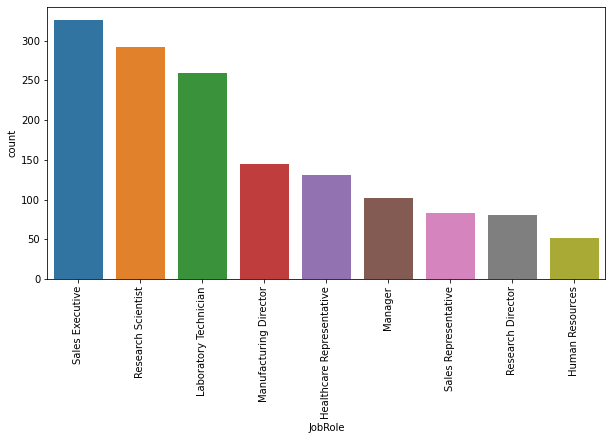

In [29]:
print(df['JobRole'].value_counts())
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['JobRole'])
plt.show()

As we can see the organization has more number of Sales Executives, 292 empoloyees are Research Scientist, 259 employees are Laboratory Technician, 145 employees are Manufacturing Director, 131 employees are Healthcare Representative, 102 employees are Manager, 83 employees are Sales Representative, 80 employees are Research Director and only 52 employees are Human Resources.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


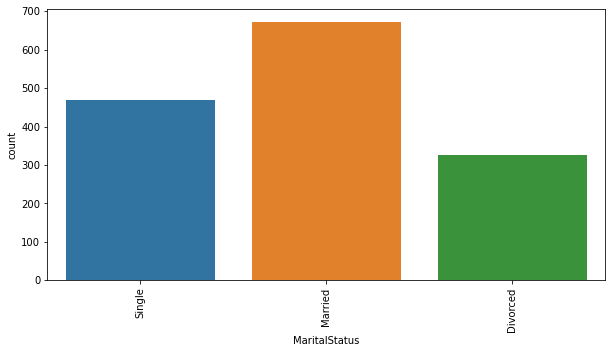

In [30]:
print(df['MaritalStatus'].value_counts())
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['MaritalStatus'])
plt.show()

The graph states that 673 employees are married, 470 employees are Single and 327 employees are Divorced. This info doesnt sounds relevant, we can drop this column in future.

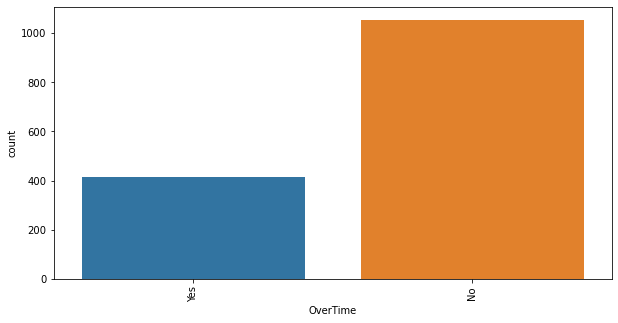

In [31]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['OverTime'])
plt.show()

We can observe that few number of Employess have done Overtime in the company.

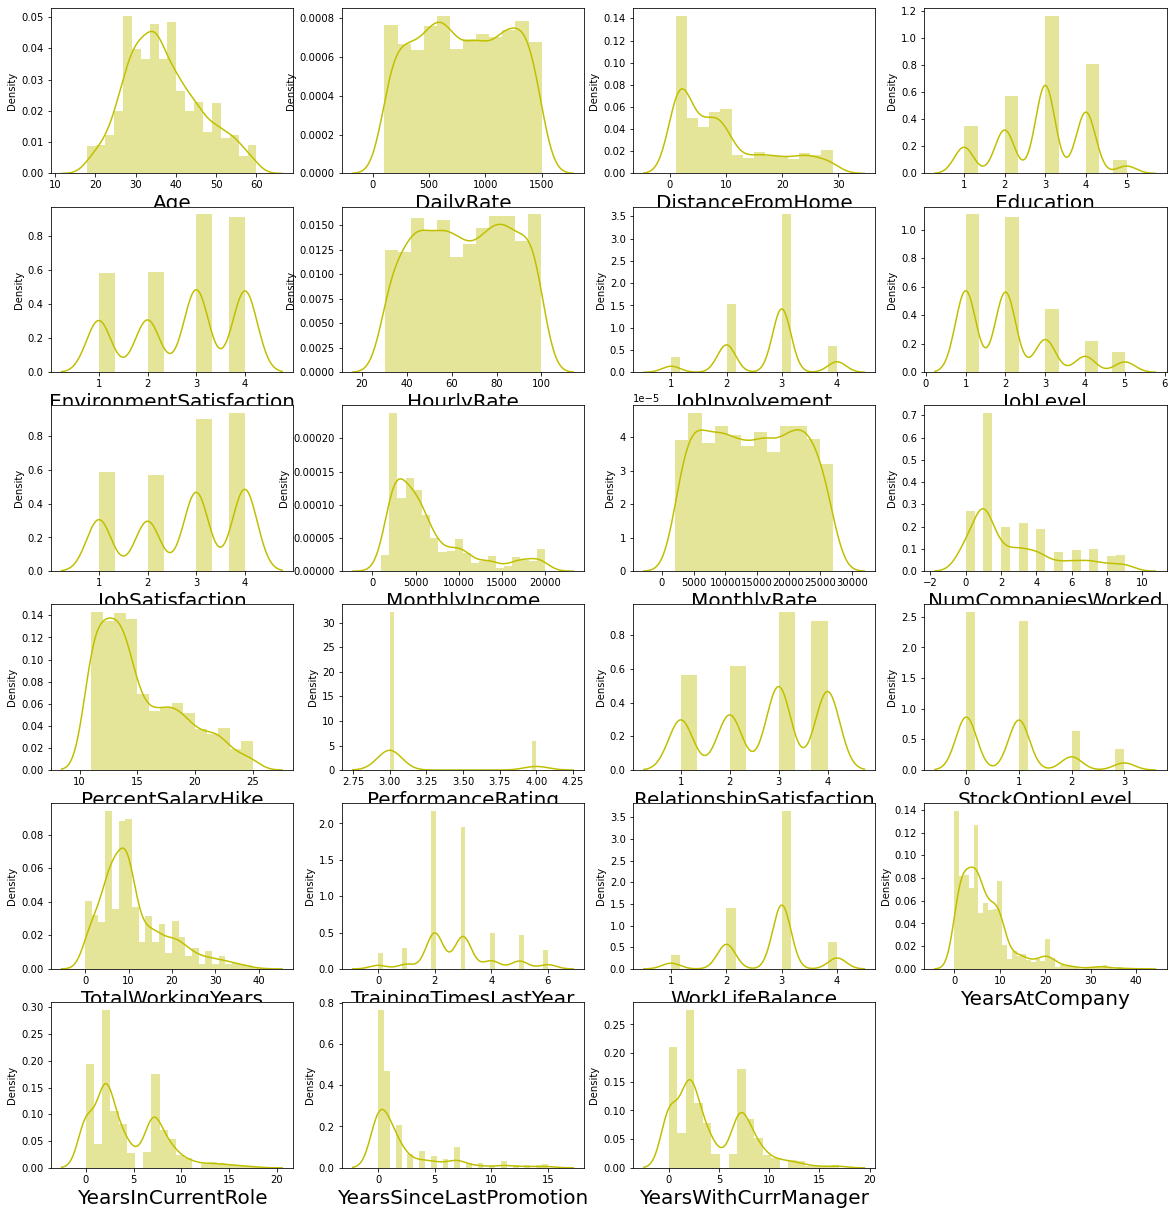

In [32]:
# Checking how the data is distributed in each column.
plt.figure(figsize=(20,25))
plotnumber = 1

for col in numeric_col:
    if plotnumber<=25:
        ax = plt.subplot(7,4,plotnumber)
        sns.distplot(df[col],color='y')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

From the graphs we can observe that none of the columns are normally distributed. Also there is a huge skewness in almost all of the features, most of them are skewed to the left which means median is more than the mean. This skewness needs to be removed later.

2.Bivariate Analysis

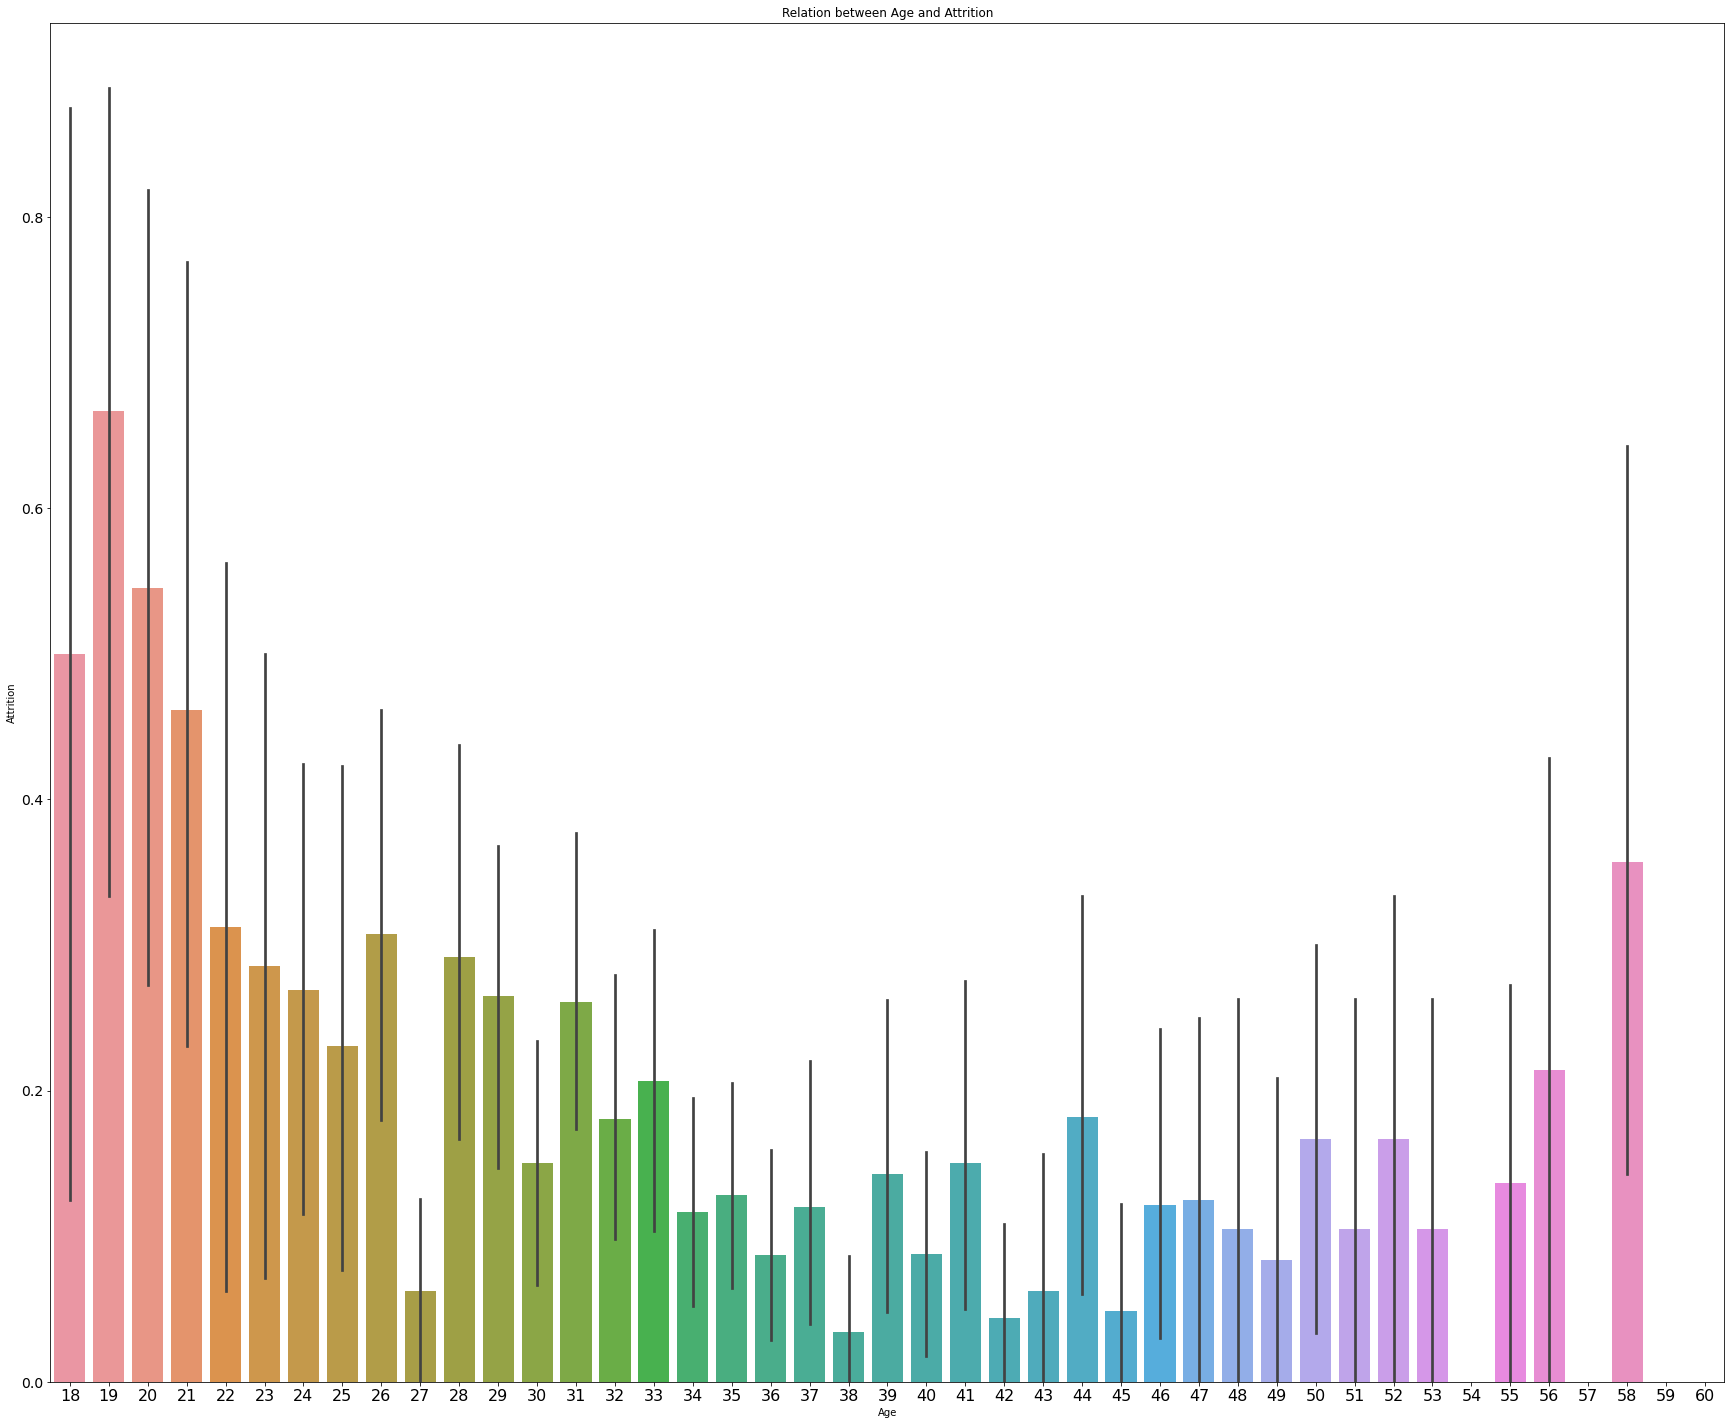

In [33]:
# Plotting graph to see the relation between 'Age' and 'Attrition'
plt.figure(figsize=[30,25])
sns.barplot(x='Age', y='Attrition', data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 14)
plt.title('Relation between Age and Attrition')
plt.show()

From the graph we can say that the rate of attrition is high among the age group of 18 to 21.
The rate of attrition is low among the age group of 34 to 53.

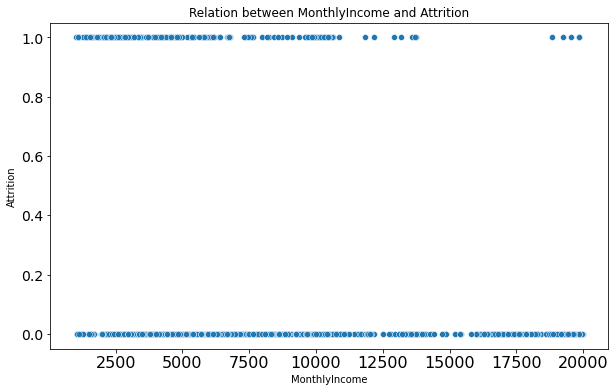

In [34]:
# Plotting graph to see the relation between 'Age' and 'Attrition'
plt.figure(figsize=[10,6])
sns.scatterplot(x='MonthlyIncome', y='Attrition', data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 14)
plt.title('Relation between MonthlyIncome and Attrition')
plt.show()

Employees with lower income rate quitted the job more compared to the Employees having high income rate.

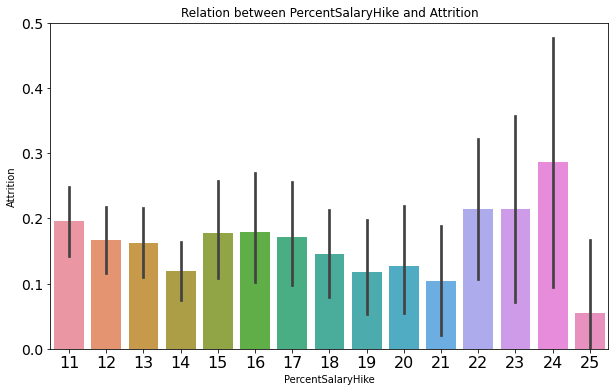

In [35]:
# Plotting graph to see the relation between 'Age' and 'Attrition'
plt.figure(figsize=[10,6])
sns.barplot(x='PercentSalaryHike', y='Attrition', data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 14)
plt.title('Relation between PercentSalaryHike and Attrition')
plt.show()

Its clear from the graph that the PercentSalaryHike affects the attrition rate.

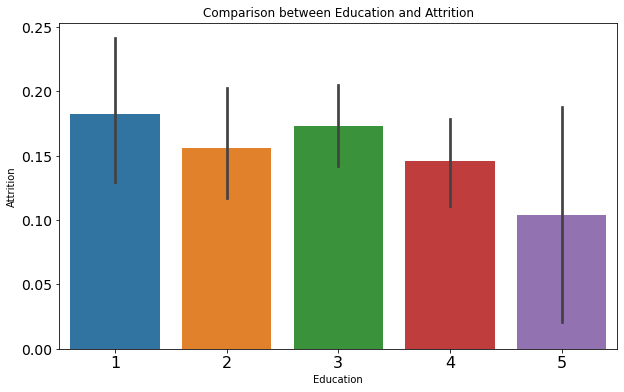

In [36]:
# Plotting graph to see the relation between 'Age' and 'Attrition'
plt.figure(figsize=[10,6])
sns.barplot(x='Education', y='Attrition', data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 14)
plt.title('Comparison between Education and Attrition')
plt.show()

Education of the Employee also affects the attrition rate.

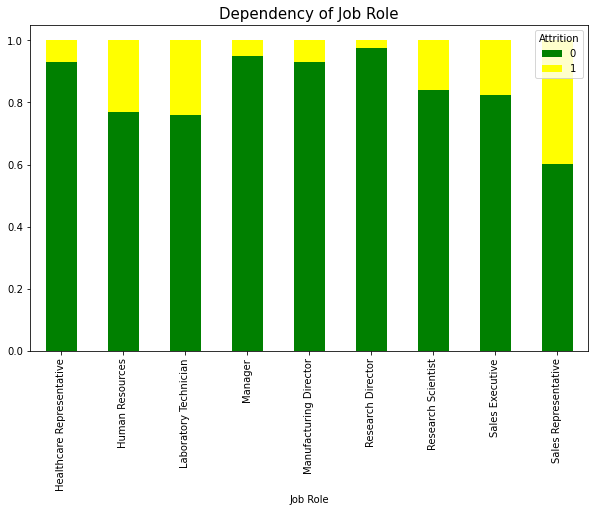

In [37]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'yellow'], 
                                                figsize=(10,6))
plt.title('Dependency of Job Role', fontsize=15)
plt.xlabel('Job Role')
plt.show()

Attrition Rate is High for :¶

Sales Representative
Sales Executive
Human Resources
Laboratory Technician

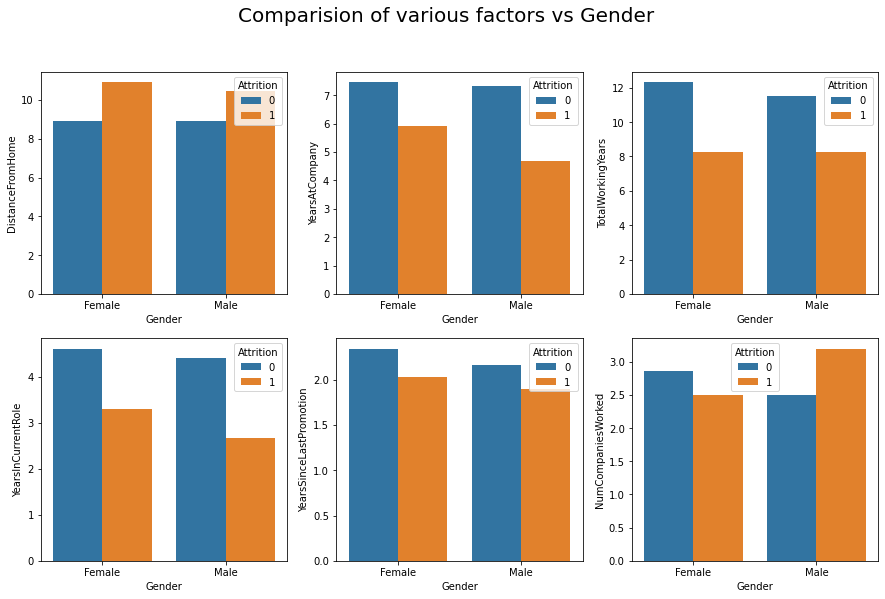

In [38]:
#Comparison of Gender with other Factors
fig,ax = plt.subplots(2,3, figsize=(15,9))           
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(df['Gender'],df['DistanceFromHome'],hue = df['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(df['Gender'],df['YearsAtCompany'],hue = df['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(df['Gender'],df['TotalWorkingYears'],hue = df['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(df['Gender'],df['YearsInCurrentRole'],hue = df['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(df['Gender'],df['YearsSinceLastPromotion'],hue = df['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(df['Gender'],df['NumCompaniesWorked'],hue = df['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

#### Encoding the dataframe

In [39]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


We are not changing all the columns for Ordinal encoder becasue we have only eight columns as Ordinal encoder hence we did only for that five columns

#### Description of Dataset

In [40]:
#Checking the Statistical Summary of the dataset
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Heatmap And Describe Finding

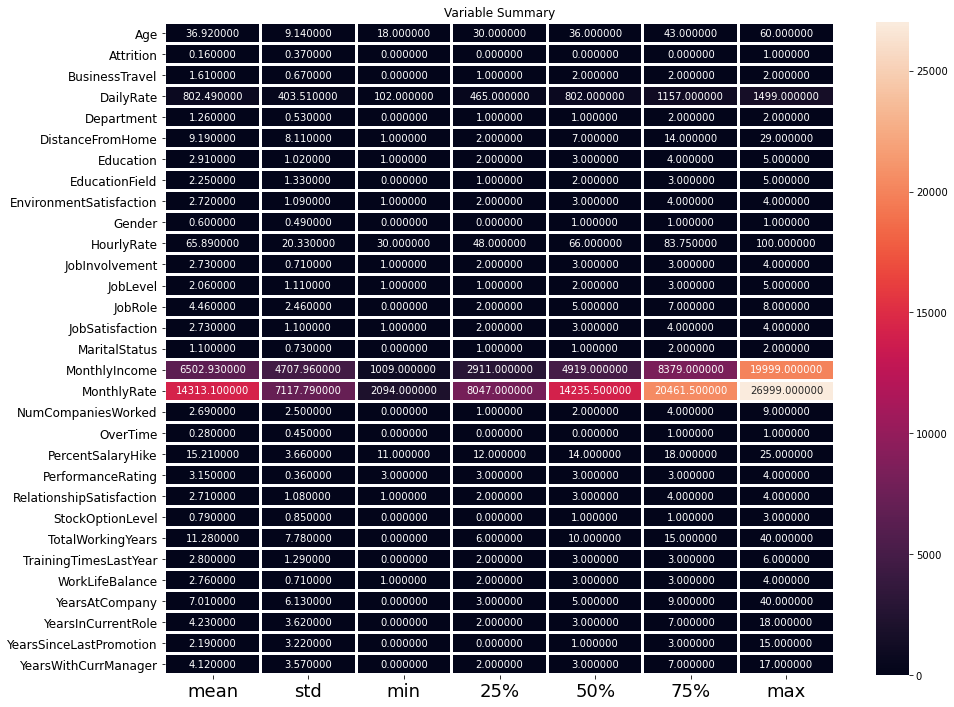

In [41]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2, annot = True, fmt = 'f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

#### Checking for Correlation

In [42]:
# checking the correlation of features and labels
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


#### Visualization using Heatmap

<AxesSubplot:>

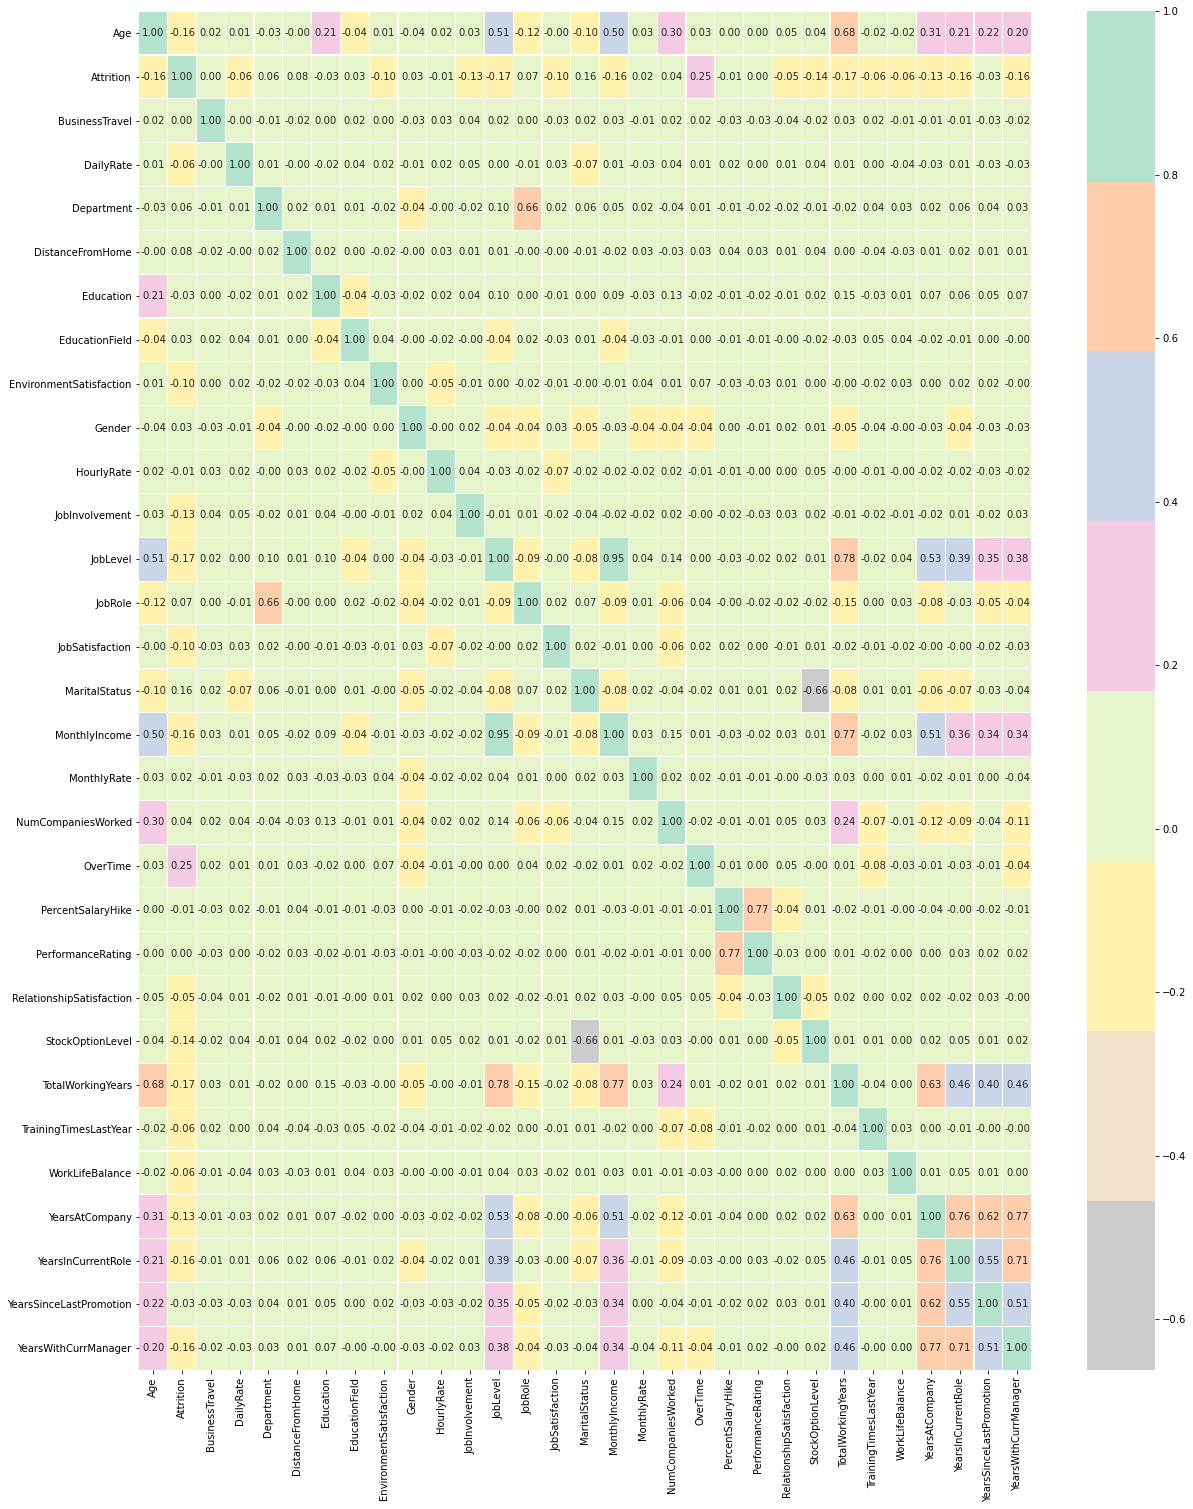

In [43]:
# Visualizing the correlation matrix
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),linewidths = 0.1,fmt='0.2f',annot=True,cmap='Pastel2_r')

#### Visualizing Correlation between label and features using Barplot

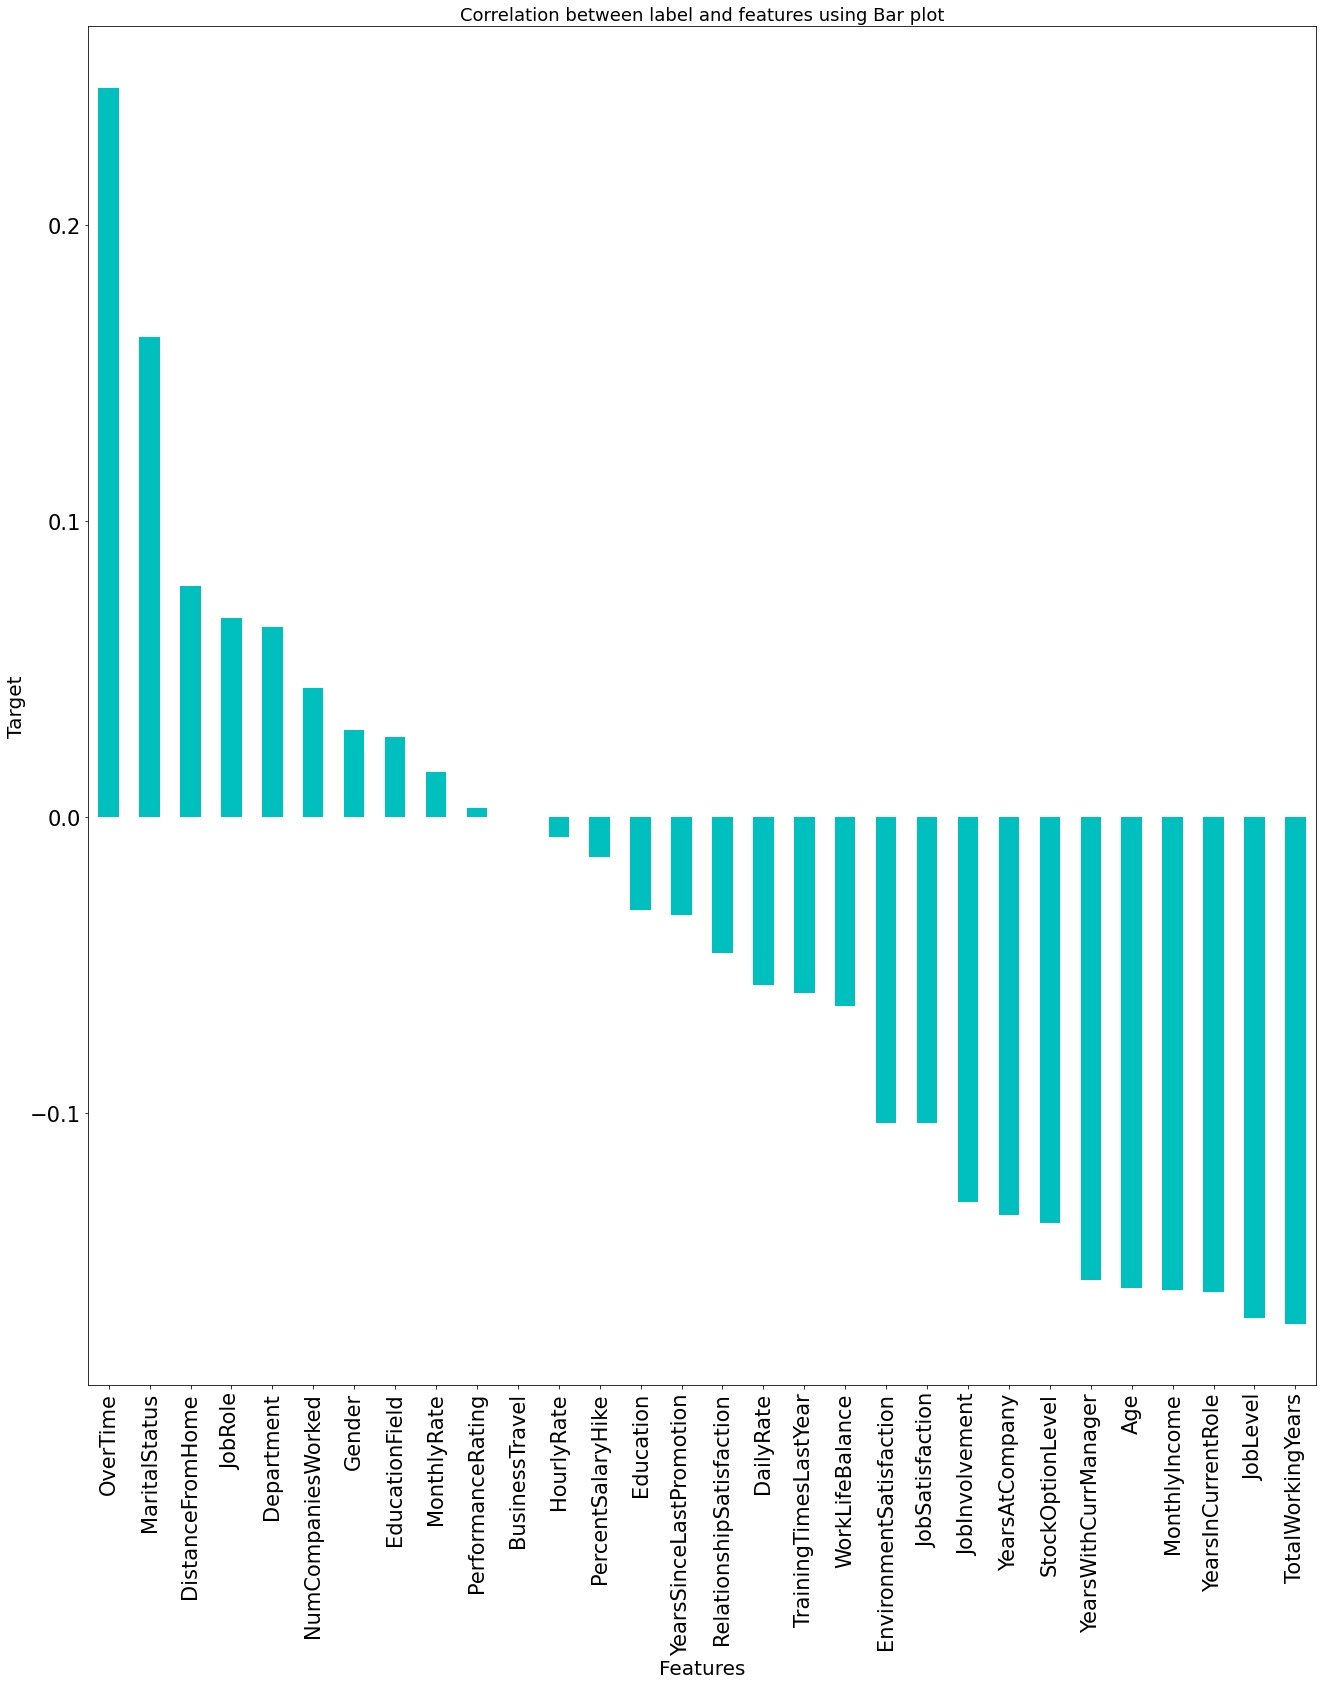

In [45]:
plt.figure(figsize=(22,25))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c',fontsize=21)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

In [ ]:
Positively Correlated Columns :
OverTime
MaritalStatus
DistanceFromHome
JobRole
Department
NumCompaniesWorked
Gender
EducationField
MonthlyRate
Performance Rating

In [ ]:
Negatively Correlated Columns:
TotalWorkingYears
JobLevel
YearsInCurrentRole
MonthlyIncome
Age
YearsWithCurManager
StockOptionLevel
YearsAtcompany
JobInvolvement
JobSatisfaction
EnvironmentSatisfaction
WorkLifeBalance
TrainingTimesLastYear
DailyRate
We can hence drop the least correlated featues

In [46]:
df.shape

(1470, 31)

In [47]:
df = df.drop(['PerformanceRating','BusinessTravel','HourlyRate'],axis=1)
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2.0,1,2,1.0,2,0.0,3,...,11,1,0,8,0,1,6,4,0,5
1,49,0,279,1.0,8,1,1.0,3,1.0,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,1373,1.0,2,2,4.0,4,1.0,2,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1392,1.0,3,4,1.0,4,0.0,3,...,11,3,0,8,3,3,8,7,3,0
4,27,0,591,1.0,2,1,3.0,1,1.0,3,...,12,4,1,6,3,3,2,2,2,2


#### Checking for Outliers

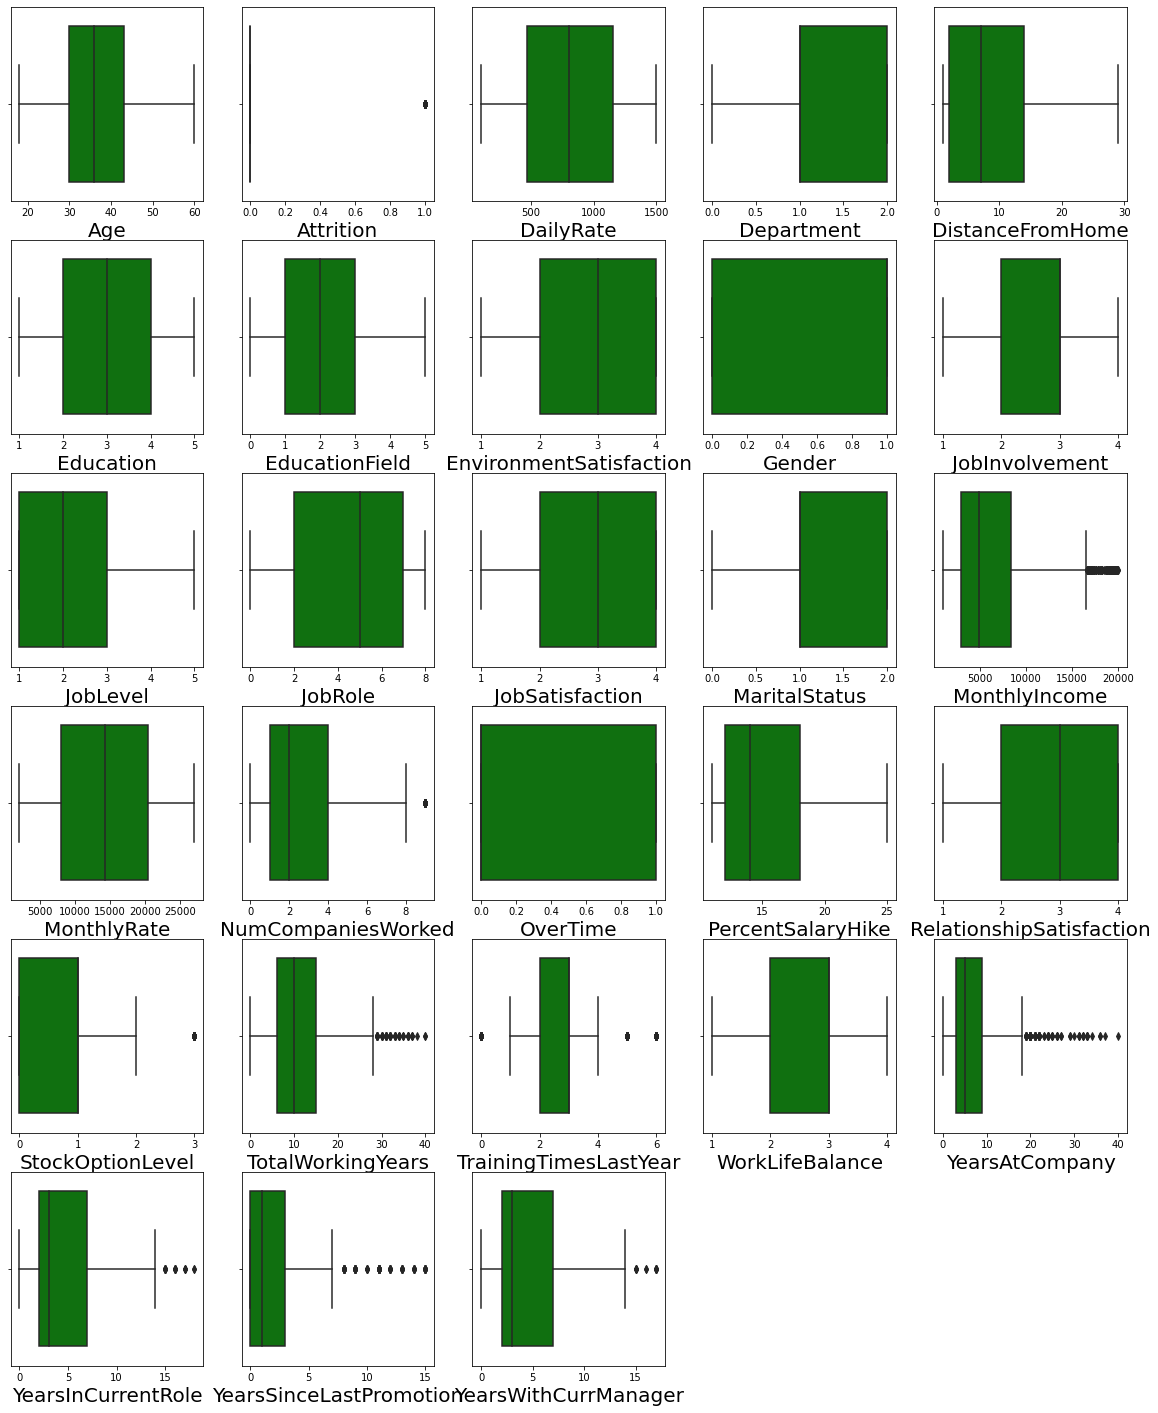

In [48]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=28:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The features having outliersa are - "MonthlyIncome","NumCompaniesWorked","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","Attrition". In that we can leave Attrition columns because It is categorical data. So, we will rectify in further step

#### Removing outliers

1.Zscore method

In [49]:
features =df[["MonthlyIncome","NumCompaniesWorked","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany",
              "YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","Attrition"]]

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(features))
z.shape

(1470, 10)

In [51]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([8, 7, 5, 7, 6, 7, 3, 3, 5, 7, 6, 7, 8, 3, 5, 7, 8, 7, 3, 8, 5, 6,
       7, 6, 8, 5, 7, 3, 5, 6, 7, 7, 8, 3, 5, 5, 7, 7, 3, 6, 5, 5, 7, 5,
       8, 7, 5, 3, 5, 7, 8, 3, 8, 5, 7, 5, 8, 7, 6, 6, 5, 7, 7, 7, 5, 7,
       7, 8, 3, 5, 7, 5, 7, 7

In [52]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 28)
(1387, 28)


In [53]:
# checking data loss prercent
data_loss = (1470-1387)/1470*100
data_loss

5.646258503401361

So, using zscore the data loss is not more. Now checking with IQR technique.

2.IQR(Inter Quantile Range) method

In [54]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1 = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [55]:
print(df.shape)
print(df1.shape)

(1470, 28)
(762, 28)


In [56]:
# checking data loss
loss = (1470-925)/1470*100
loss

37.07482993197279

There is a huge data loss using IQR, so we will consider Zscore method.

#### Separating features and labels

In [57]:
# Splitting the independent and dependent columns

x = df_new.drop(['Attrition'], axis =1)
y = df_new['Attrition']

#### Checking for Skewness

In [58]:
# Checking for the Skewness

x.skew()

Age                         0.472280
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
d

#### Removing the skewness from the dataset:

We're using power_transform function to remove skewness from the dataset.

In [59]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

Age                        -0.004079
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
d

We can see that after using the function power_transform the skewness is removed from the dataset.

#### Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.5366811 ,  0.73432467,  1.40537338, ...,  0.04090327,
        -0.71069889,  0.36826963],
       [ 1.44211114, -1.30776866, -0.49633675, ...,  0.96589518,
        -0.31047991,  0.9821999 ],
       [ 0.08396607,  1.40675151, -0.49633675, ..., -1.19241928,
        -0.71069889, -1.16655603],
       ...,
       [-1.04782149, -1.61544736, -0.49633675, ..., -0.575758  ,
        -0.71069889, -0.24566063],
       [ 1.44211114,  0.53830356,  1.40537338, ...,  0.65756454,
        -0.71069889,  1.28916503],
       [-0.2555702 , -0.44180199, -0.49633675, ..., -0.26742737,
        -0.31047991, -0.55262577]])

#### Handling data Imbalance by over sampling:

In [61]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [62]:
y_over.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

#### Finding best random state:

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8158273381294964  on Random_State  53


We found that the best random_state value is 172. We'll create train_test split at random state = 172

#### Creating train_test Split:

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=172)

### Model Making

#### 1.LogisticRegression:

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7956834532374101
[[276  70]
 [ 72 277]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       346
           1       0.80      0.79      0.80       349

    accuracy                           0.80       695
   macro avg       0.80      0.80      0.80       695
weighted avg       0.80      0.80      0.80       695



From LogisticRegression we're getting 80% accuracy score.

#### RandomForestClassifier:

In [66]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.9266187050359712
[[335  11]
 [ 40 309]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       346
           1       0.97      0.89      0.92       349

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



From RandomForestClassifier we're getting 93% accuracy score.

#### DecisionTreeClassifier:

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8446043165467626
[[294  52]
 [ 56 293]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       346
           1       0.85      0.84      0.84       349

    accuracy                           0.84       695
   macro avg       0.84      0.84      0.84       695
weighted avg       0.84      0.84      0.84       695



From DecisionTreeClassifier, we're getting 84% accuracy score.

#### SVC:

In [68]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.8964028776978418
[[309  37]
 [ 35 314]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       346
           1       0.89      0.90      0.90       349

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695



From SVC we're getting 90% accuracy score.

#### GradientBoostingClassifier:

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test, predgb))

0.9093525179856116
[[331  15]
 [ 48 301]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       346
           1       0.95      0.86      0.91       349

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



From GradientBoostingClassifier we're getting 91% accuracy score.

#### Checking for cross validation score

In [70]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.8716619484196038


In [71]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.8536477677064124


In [72]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.775762927564086


In [73]:
# Checking cross validation score of SVC:

scr = cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.8630262576942057


In [74]:
# Checking cross validation score of GradientBoostingClassifier:

scr = cross_val_score(gb,x,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.8550814222268395


#### Best Model:

#### Hyper parameter tuning:

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [90]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [92]:
# Finding the best parameter found by GridSearchCV
GCV.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [93]:
# Printing how the model looks like after hyper-parameter tuning

GCV.best_estimator_

SVC(C=10, gamma=0.1)

In [94]:
model = GCV.predict(x_test)

print(classification_report(y_test, model))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       346
           1       0.97      0.95      0.96       349

    accuracy                           0.96       695
   macro avg       0.96      0.96      0.96       695
weighted avg       0.96      0.96      0.96       695



After hyper parameter tuning we got 96% accuracy score.

#### AUC ROC Curve:

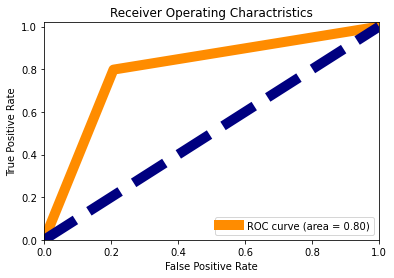

In [95]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(predlr, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

#### Saving the final model:

In [96]:
import pickle
filename = 'hr_analytics.pkl'
pickle.dump(lr, open(filename, 'wb'))

#### Conclusion:
Checking the difference between the Original and Pridicted values

In [97]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
690,1,1
691,1,1
692,1,1
693,1,0
